# Importing Dataset 

In [1]:
# To Read CSV file
import pandas as pd

# To split dataset for testing and training
from sklearn.model_selection import train_test_split

# To calculate the accuracy of predicted result
from sklearn.metrics import accuracy_score

# To plot graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
diabetes_df = pd.read_csv('diabetes_csv.csv')
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [3]:
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
diabetes_df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
diabetes_df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

# Data Cleaning

In [7]:
diabetes_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### plas, pres, skin, insu and mass can't have value 0.

In [8]:
0 in diabetes_df.plas

True

In [9]:
0 in diabetes_df.pres

True

In [10]:
0 in diabetes_df.skin

True

In [11]:
0 in diabetes_df.insu

True

In [12]:
0 in diabetes_df.mass

True

### Replacing zero with mean of respective column

In [13]:
import numpy as np

In [14]:
zero_not_accepted = ['plas', 'pres', 'skin', 'insu', 'mass']

In [15]:
for column in zero_not_accepted :
    diabetes_df[column] = diabetes_df[column].replace(0, np.NaN)
    mean = int(diabetes_df[column].mean(skipna=True))
    diabetes_df[column] = diabetes_df[column].replace(np.NaN, mean)

# Data Exploration and Visualization

In [16]:
# Checking the distribution of the predictor variables

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preg', ylabel='Density'>

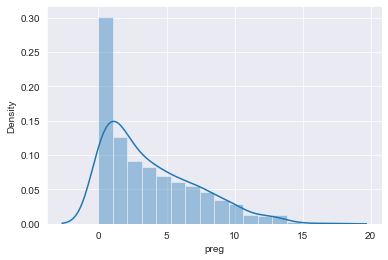

In [17]:
# Distribution of Pregnancies

sns.distplot(diabetes_df.preg)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='plas', ylabel='Density'>

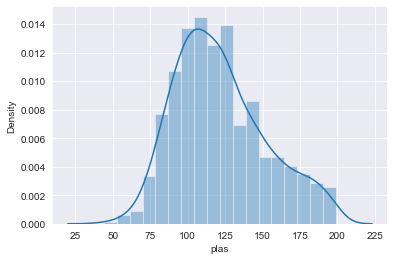

In [18]:
# Distribution of Plasma

sns.distplot(diabetes_df.plas)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pres', ylabel='Density'>

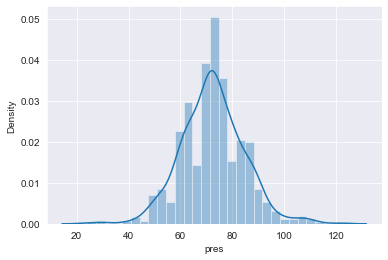

In [19]:
# Distribution of Blood Pressure

sns.distplot(diabetes_df.pres)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skin', ylabel='Density'>

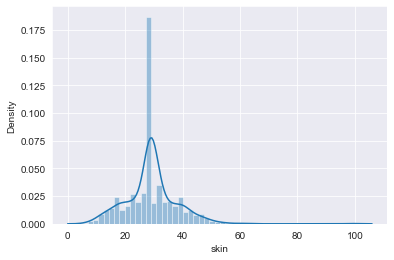

In [20]:
# Distribution of Skin Thickness

sns.distplot(diabetes_df.skin)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insu', ylabel='Density'>

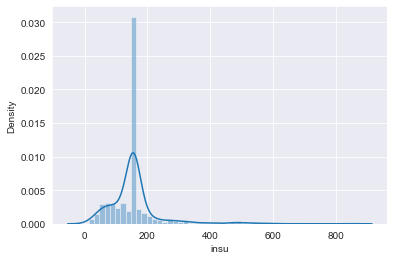

In [21]:
# Distribution of Insulin

sns.distplot(diabetes_df.insu)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mass', ylabel='Density'>

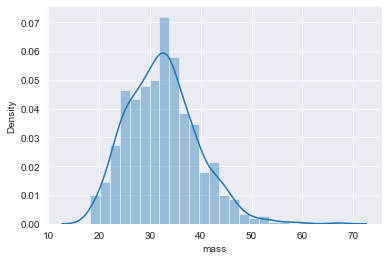

In [22]:
# Distribution of Body Mass Index

sns.distplot(diabetes_df.mass)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pedi', ylabel='Density'>

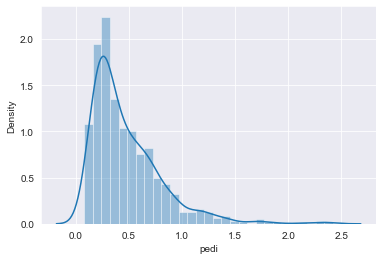

In [23]:
# Distribution of Diabetes Pedigree Function

sns.distplot(diabetes_df.pedi)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

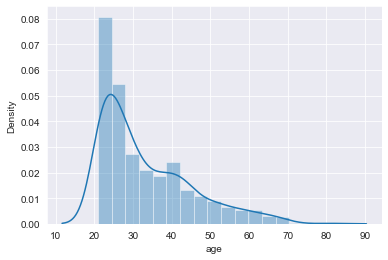

In [24]:
# Distribution of Age

sns.distplot(diabetes_df.age)

In [25]:
# Rename class values as 1(for tested_positive) and 0(for tested_negative) to check correlation.

diabetes_df['class'] = diabetes_df['class'].replace('tested_positive', 1)
diabetes_df['class'] = diabetes_df['class'].replace('tested_negative',0)
diabetes_df.corr()

,preg,plas,pres,skin,insu,mass,pedi,age,class
preg,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
plas,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
pres,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
skin,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
insu,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
mass,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

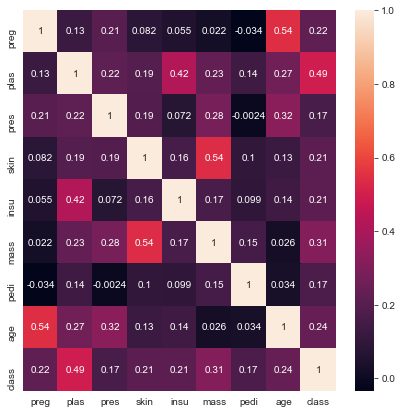

In [26]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(diabetes_df.corr(), annot=True)

In [27]:
# Reassign class value for better readablility.

diabetes_df['class'] = diabetes_df['class'].replace(1,'tested_positive')
diabetes_df['class'] = diabetes_df['class'].replace(0,'tested_negative')

diabetes_df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

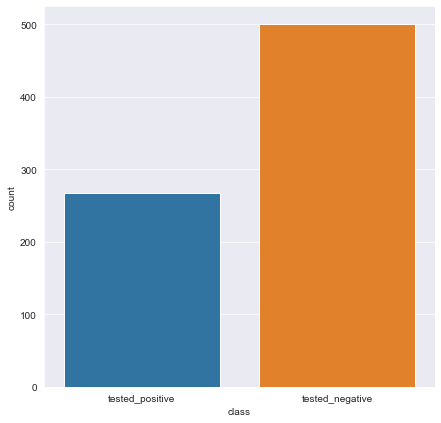

In [28]:
# Checking the distribution of the target variable(Result).

sns.countplot(diabetes_df['class'])

In [29]:
# Removing pedi and pres didn't added significant changes hence no need of removing it
# diabetes_df.drop(['pedi', 'pres'], axis=1, inplace=True)


X = diabetes_df.iloc[:,:-1]
Y = diabetes_df.iloc[:,-1]

In [30]:
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,tested_positive
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,tested_negative
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,tested_positive
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,tested_negative
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,tested_negative
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,tested_negative
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,tested_negative
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,tested_positive


In [31]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [32]:
Y

0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: class, Length: 768, dtype: object

# Training the data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

# Building Model

## 1. Random Forest

In [34]:
# To model Random Forest


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, Y_train)

Y_predict = rfc.predict(X_test)

Y_predict

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negati

### Random Forest Accuracy

In [35]:
accuracy_score(Y_test, Y_predict)

0.7705627705627706

## 2. Decision Tree

In [36]:
# To model Random Forest


from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

Y_predict = dtc.predict(X_test)

Y_predict

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negati

### Decision Tree Accuracy

In [37]:
accuracy_score(Y_test, Y_predict)

0.683982683982684

# 3. Support Vector Machine (SVM)

In [38]:
# To model Support Vector Machine

from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, Y_train)

Y_predict = svm_model.predict(X_test)

Y_predict

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negati

### Support Vector Machine (SVM) Accuracy

In [39]:
accuracy_score(Y_test, Y_predict)

0.7359307359307359

# 4. K Nearest Neighbors (KNN)

In [40]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print('Training data:')
print(X_train)
print()
print('Testing data')
print(X_test)

Training data:
[[-0.28789734  2.16047808 -0.17285207 ...  0.65040133 -0.17925492
   0.23517861]
 [-0.58125764  0.04378323 -0.17285207 ...  0.7097548  -0.3853659
  -0.53177025]
 [ 0.59218353  0.53225127 -0.91476509 ... -1.15987961 -0.9582332
   1.85429285]
 ...
 [ 0.29882324  1.11841293  0.98123485 ...  0.9916838   0.46029534
   0.06474553]
 [-0.58125764 -1.09597554 -1.16206943 ...  0.1013817  -0.91276754
  -0.70220333]
 [ 1.4722644  -1.58444358  0.48662617 ... -0.06184035 -0.56722854
   0.40561168]]

Testing data
[[-0.58125764 -0.11903945  1.47584353 ... -1.01149592 -0.46720409
  -1.04306949]
 [-1.16797822  0.66250942 -0.00798251 ...  1.54070343 -0.79455683
  -0.36133717]
 [-1.16797822 -0.90058832 -0.99719987 ...  0.48717928 -0.61875628
  -0.70220333]
 ...
 [ 1.4722644   0.43455767  0.15688705 ... -0.90762734 -0.02164064
   4.06992288]
 [-0.28789734  1.6394455  -0.00798251 ...  0.19041191 -0.81274309
  -0.78741987]
 [ 1.17890411  2.45355891  0.32175661 ...  0.81362338  0.41786072
   2.

In [41]:
# To model K Nearest Neighbors (KNN)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

Y_predict

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negati

### K Nearest Neighbors (KNN) Accuracy

In [42]:
accuracy_score(Y_test, Y_predict)

0.7619047619047619